# Measuring Distances with Norms and Metrics
Module 0 | Chapter 2 | Notebook 4

***
In the last lesson we got to know the scalar product and length of vectors. From this we calculated the cosine similarity of the wines. Now we will look at an alternative way of calculating the similarity. In this exercise you will learn:
* How to calculate distances between two data points
* The big differences between metrics and norms
* How to caluclate the similarity of data points with the L2 norm 
***


## A brief look at metrics and norms


**Scenario:** 1001Wines is an online retailer that sells wines through its website. 1001Wines would like to recommend its customers high-quality wines that might be to their taste.
They therefore want to create a recommendation tool to compare the similarity of purchased wines with other wines from the assortment. If a wine from the range is similar to what customers have already ordered, it should be recommended to them.


In the last lesson you already developed a measure of similarity. This assesses the similarity of two wines based on the ratio between the proportions of sugar and sulphates in the wine. In principle, this was not a bad assumption if you don't have domain knowledge yourself. But now the sommeliers at 1001Wines have had their say and said that the ratio of the proportions is not what determines the different flavour, but rather the total number of ingredients. Sometimes the exact requirements only come to light in the course of the project. But this isn't a problem. You will develop an degree of similarity based on this in this lesson.


The concept of similarity in our imagination is closely related to the concept of distance. The smaller the distance, the more similar the data points are. However, it makes sense to distinguish these two concepts from each other. When we speak colloquially of similarity, we usually mean a similarity in one or more specific characteristics. it's possible that two objects are very similar in certain aspects, but in others they are very different. For example, we previously dealt with the cosine similarity. Two vectors are similar in this case if they point roughly in the same direction. In addition to a direction, vectors also have a length. Would we call two vectors which point in the same direction, but have very different lengths similar in day-to-day life? This can depend on the context. Instead of the similarity we can also speak about the distance between two objects. In linear algebra we refer to metrics when we talk about distances. Metrics are, so to speak, a generalization of the concept of distance that we use in everyday life. Metrics have certain characteristics that our concept of distance from everyday life also has. 
A metric $d(x,y)$ meets the following properties:

* $d(x,y)\: \ge 0; \: d(x,y) = 0$, g.d.w. $x=y$: (positive definite)
* $d(x,y) = d(y,x)$ (symmetry)
* $d(x,y)\le d(x,c)+d(c,y)$ (triangle inequality)


We can now bring these mathematical definitions to life. In everyday life we indicate distances in meters, for example. So we can take a meter rule and measure the length. Following this intuition, we can assume that distances cannot assume negative values. Furthermore, we expect that a distance of $0$ is only present if the two objects are in exactly the same position. This is exactly the first property of metrics. The second property describes the following observation: if you measure the distance between two objects, e.g. with a ruler, the distance does not depend on whether you place one end of the ruler at object $x$
and read the distance to $y$, or if you do it the other way around. The last property describes that the distance should describe the shortest path between the objects. The distance from $x$ to $y$ should always be less than or equal to the sum of the distances from $x$ to another point $c$ and the distance from $c$ to $y$. Specifically: If we leave our home to drive to the cinema, the kilometer counter when we get to the cinema should at most display the length of the route travelled that it would have displayed if we had picked up a friend on the way. In the best case the person lives directly on the route, then both traveled routes are identical. Otherwise we have to make a detour and the route we travel becomes longer. 
As far as we are concerned, the length and distance are the same. In linear algebra this is not quite the case. A distinction is made there between distances (metrics) and lengths (norms). If we have a measure of length (a norm), we can always use it to measure a distance (a metric). We define a vector that connects the two points and determine its norm. The reverse is not necessarily true. The following metric is an example of a metric that cannot be used as a norm:

$d(x,y)=\begin{cases}0&\text{if} x=y \\ ||x||+||y|| & \text{otherwise} \end{cases}$

This distance function is not based on the norm of the vector connecting the two points and that means you cannot derive a norm from this metric in a clear way. 


Let's make this a little clearer. In the last lesson, we calculated the cosine similarity of the wines. For this, we need the angle between two vectors.

![angle between 2 vectors](00-02-02-pic4.png)


This measures to a certain extent the similarity of the direction of two vectors. It is easy to be convinced that cosine similarity is neither a metric nor a norm. 
So how about the lengths of the vectors? You can calculate this for each vector individually. You don't need a second one to be able to do this. So the length is a norm. So we used the `norm()` function to calculate the length of vectors. If we have a norm, we can always use it to create a metric. Let's try that out now.

In everyday life, for example, we might say things like: "The distance from the starting blocks to the finish line is 100 meters." To get to 100 meters, we measure the distance from the start point and finish point. These are also data points with two properties: their coordinates. We can plot the distance between the points on a plane with a vector and then measure its length.

![distance between start and end point](00-02-03-pic1.png)


In this visualization we have chose an arbitrary zero point. For example, this could be your seat as a spectator. The start position is given by coordinates `[13, 52]` and the end point by `[113, 52]`. The distance between the points corresponds to the length of the vector. So far we have always started the vectors from the point `[0, 0]`. If we start from a different point, we simply subtract the vector of the starting point from the vector of the end point. Try it out! Create a new vector by subtracting `[13, 52]` from `[113, 52]`. How long is the new vector?


In [83]:
import numpy as np
from numpy.linalg import norm

vec = np.array([13,52])
vec2 = np.array([113,52])
vec_length = norm(vec2 - vec)
print(vec_length)


100.0


The length is 100. Since we have given the coordinates in meters from our position, it's 100 meters.
The `norm()` function calculates the length of a vector, which we can use to measure a distance! If you don't specify additional arguments it calculates the Euclidean norm. This is the norm we use in everyday life to measure distances. It is also called the **L2 norm**. Remember this term, because it comes up a lot in the context of machine learning.

Our distinction between metric and norm is somewhat crude. There are also precise mathematical definitions for both of them. But don't worry, you don't need to learn them now. The most important thing is that you connect the terms **norm** and **metric** with **measuring lengths and distances** of vectors.


**Congratulations:** You now know the terms metric and norm. You will encounter them very often in the field of machine learning. Now we will use the L2 norm to determine a similarity between the wines.


## Product recommendation with the L2 norm


Run the next cell to import the data quickly and to print the first 5 rows.


In [86]:
import pandas as pd
df = pd.read_csv('wine-quality.csv')
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white


Last time we limited ourselves two properties, because we could visualize the results more easily. Mathematically speaking, however, it makes no difference how many entries our vectors have. We can calculate angles and lengths in all cases. So this time we will use all the columns except `'color'`, because this is not numeric. Each row of data (and therefore each wine) is a separate vector, which we will use to calculate the distances between the data points. 

First we would like to get a feeling for the distances to be able to say when two wines are similar. Calculate the L2 norm between each wine and the wine with index 0. Remember that you must subtract the corresponding vectors from each other before calculating the length (L2 norm). So the numerical values of the rows describe our start and end point, just like in the 100 meter sprint.
Save these distances as a list in the variable `distance_idx0` and print the first two values.


In [87]:
distance_idx0 = []
for i in df.index:
    distance_idx0.append( norm(df.iloc[i,:-1] - df.iloc[0,: -1]))

print(distance_idx0[:2])
print(len(distance_idx0))

[0.0, 52.63917709273199]
6497


The distance from the wine with index 0 to itself is 0. This is to be expected since it is just one wine. The distance to the wine with index 1 is roughly 52.6. Maybe you're wondering what that distance means. We are only familiar with measuring distances in units like meters in two or three dimensions. However, the concept can be applied to as many dimensions as you wish, the calculation remains the same. The distance is always only a number. We use them to determine how similar two data points are. Because the vector between two data points is shorter when they have very similar values. 

It's best for us to get an overview of the distribution of the distances so that we can better evaluate them.
Now print the distribution of your distances with a histogram with 50 bins.


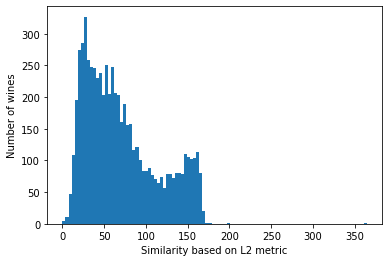

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.hist(distance_idx0, bins=100)
ax.set(xlabel='Similarity based on L2 metric',ylabel='Number of wines');

Our histogram looked something like this:

![del](00-02-03-pic2.png)


We can see that the number of wines starts to increase rapidly with the distance. We could now determine a value on the x-axis that reflects our maximum distance so that a wine is still considered similar. This distribution could however be different for other wines. This could lead to a case where we're not able to recommend any wine at all because we restricted the distance too much. For a product recommendation it makes more sense to always select a fixed number. For example the 10 most similar wines. It's our goal for this lesson to write this function.


Use the following steps:
* Define a function called `wine_recommendation_L2` with the parameters `df_wines`, `wine_id` and `quantity`. `df_wines` is the data frame containing the wine data. `wine_id` is the index of the wine a customer has bought. And `quantity` is the number of wines to be recommended.
* Define the variable `cols` internally in the function. It contains all the column names of the data except for `color`.
* Create a loop or *list comprehension* which iterates directly through the row names in `df.index`.
* It should calculate the distance between each wine and the wine with index `wine_id`. To do this, treat the rows of data in the same way as the start and end points for the 100 meter sprint. The row with index `wine_id` is always the starting point. The loop's iterator variable returns the line of the target point. So subtract them and calculate the L2 norm of the result. Assign these distances as a list to the `distances` variable.
* Select the smallest distances with `quantity`. Their index corresponds to the wines to be recommended.
* Use the keyword `return` to output the index of wines to be recommended as a `list` or `array`.
* Add a docstring to your function. Use 3 double quotation marks for this. The *docstring* should contain a short description of the function and the parameters and output values. You can look at the *docstring* from the last exercise for some inspiration.

You can use this function header to orientate yourself

```python
def wine_recommendation_L2(df_wines, wine_id, quantity):
    """Return positions of wines in df_wines, which are similar to the wine at position wine_id.
    
    Use L2 norm as a measure of similarity between two wines.
    
    Args:
        df_wines (DataFrame): Contains the wines quality data.
        wine_id (int): Position in df_wines of the wine, on which the recommendation is based.
        quantity (int): Number of recommended wines to return.

    Returns:
        recommendations (list): Contains the positions of quantity wines that are most similar to wine_id.
        
    """
```

Tip: The easiest way to select the smallest distances from a list is to use the function `np.argsort()`. It sorts the list in ascending order and returns its indices as an array. The smallest values are therefore at the beginning of the array.


In [89]:
def wine_recommendation_L2(df_wines, wine_id, quantity):
    """Return positions of wines in df_wines, which are similar to the wine at position wine_id.
    
    Use L2 norm as a measure of similarity between two wines.
    
    Args:
        df_wines (DataFrame): Contains the wines quality data.
        wine_id (int): Position in df_wines of the wine, on which the recommendation is based.
        quantity (int): Number of recommended wines to return.

    Returns:
        recommendations (list): Contains the positions of quantity wines that are most similar to wine_id.
        
    """
    cols = df_wines.columns[:-1] 
    distances = []
    for i in range(len(df_wines)):
        distances.append( norm( df_wines.loc[i,cols] - df_wines.loc[wine_id,cols] ))
    return np.argsort(distances)[:quantity]


We should now test the function. We can expect that each wine should be most similar to itself. Since we are using all columns this time, the function should only return the position of the wine you enter if you specify `quantity = 1`. Let's try that out for a few wines. Our expectations are listed in the following table:

Input | Output 
---|---
`wine_id = 0`, `quantity = 1`, `df_wines = df` | `[0]`
`wine_id = 3200`, `quantity = 1`, `df_wines = df` | `[3200]`
`wine_id = 6400`, `quantity = 1`, `df_wines = df` | `[6400]`

Print the output values of the given with the different argument values, this may take a few seconds. Did you receive the output you were expecting?


In [90]:
wine_recommendation_L2(wine_id = 0, quantity = 1, df_wines = df)
wine_recommendation_L2(wine_id = 3200, quantity = 1, df_wines = df)
wine_recommendation_L2(wine_id = 6400, quantity = 1, df_wines = df)

array([6400])

After the small test we can now return to making actual recommendations. Which wines do you see as the output if you pass `wine_id = 0` and `quantity = 10`? Store the recommendations as `recommendation_0` and `df.loc[recommendation_0, :]`. What color are the wines?


In [91]:
recommendation_0 = wine_recommendation_L2(wine_id = 0, quantity = 10, df_wines = df)
df.loc[recommendation_0, :]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,white
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,white
103,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.0,white
1487,6.7,0.250,0.74,19.40,0.054,44.0,169.0,1.00040,3.51,0.45,9.8,white
2269,8.5,0.190,0.56,17.30,0.055,47.0,169.0,1.00047,3.07,0.67,9.3,white
191,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,white
182,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,white
14,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,white
813,6.5,0.260,0.32,16.50,0.045,44.0,166.0,1.00000,3.38,0.46,9.5,white
773,6.1,0.270,0.30,16.70,0.039,49.0,172.0,0.99985,3.40,0.45,9.4,white


We only saw white wines as a result. But that was also the case with cosine similarity. What does it look like for `wine_id = 6400`?


In [92]:
recommendation_0 = wine_recommendation_L2(wine_id = 6400, quantity = 10, df_wines = df)
df.loc[recommendation_0, :]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,color
6400,7.3,0.585,0.18,2.4,0.078,15.0,60.0,0.99638,3.31,0.54,9.8,red
1468,6.5,0.240,0.24,1.6,0.046,15.0,60.0,0.99280,3.19,0.39,9.8,white
5322,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,red
5320,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,red
4904,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,red
6081,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,red
4735,6.0,0.170,0.36,1.7,0.042,14.0,61.0,0.99144,3.22,0.54,10.8,white
4910,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9,red
1349,9.2,0.350,0.39,0.9,0.042,15.0,61.0,0.99240,2.96,0.28,10.4,white
5590,8.6,0.490,0.51,2.0,0.422,16.0,62.0,0.99790,3.03,1.17,9.0,red


This time it contains both red and white wines. So there is also an overlap with the L2 norm as a similarity. Apparently, some red and white wines are very similar.


**Important:** If you look more closely at the properties of the recommended wines, you can see that properties with low numerical values such as `chlorides` vary a lot more more, relative to their value, than properties with high numerical values, such as `total.sulfur.dioxide`. This is because all deviations of properties are treated equally for the L2 norm, regardless of how big the deviation is relative to the absolute values. The relative change of `chlorides` therefore holds less weight than that of `total.sulfur.dioxide`. Specifically: if you compare the largest value with the smallest value, you will notice that the largest value of `chlorides` is a multiple of the smallest value. In comparison, `total.sulfur.dioxide` only varies by a few percent. Depending on how the relative change in these properties affects the taste, it can distort the similarity calculation. We will show you how to solve this problem in the next module. The methods used to recommend products can then still be applied in the same way.


**Congratulations**: You have learned another method to classify products. Now you already know how to use the cosine similarity and the L2 norm to evaluate similarities. These methods are based solely on linear algebra. Now the sommeliers of 1001Wines are also satisfied. The company says thank you!


You have now learned 2 methods for calculating the similarity of products: the angle between the vectors of two data points and the Euclidean distance between two data points. If we apply these two similarities to our wines, we get the following data points as similar wines to the wine at position 6400, for example.

![Comparison of similarities with cosine and L2 norm](00-02-03-pic3.png)

For the visualization we only used the two columns `'residual.sugar'` and `'sulphates'`. On the left side we see that all points are on a straight line. This is because the angle is very narrow, so the relationships between of the columns are relatively constant.
The recommended points are in a circle on the right side. This is skewed into an ellipse in the y-direction because the scale of the y-axis is smaller in the display.

Both measures are some form of distance between the data points. Once this distance is given as an angle and once as the distance we are used to. There are many other measures that can be used to define distances between data points. Which measure you need always depends on which data you have and what you want to achieve.


## Additional metrics

The L2 norm we learned in this lesson is a representative of a whole family of metrics called Lp norms. The general formula for these metrics is

$L^p(\vec{x})= \left(\sum_i^N |x_i|^{p}\right)^{\frac{1}{p}},$

where the absolute values of the components are taken to the power of $p$, added up and then the $p$-th root is taken. If you set $p=2$, you get the L2 norm. 

$L^2=\sqrt{\sum_i^N |x_i|^{2}}$

As an example, let's try calculating that for the vector `vec`. It is defined as follows:

$\vec{vec} = \left(\begin{array}{c} 2 \\ 1 \end{array}\right)$

In Python, this vector `vec` is defined as follows:
```
vec = [2, 1]
```

For the L2 norm we get the following for the vector `vec`:
$L^2=\sqrt{|2|^2 + |1|^2}=\sqrt{4 + 1}\approx 2.3$

For $p=1$, we get another popular norm, the L1 norm. 

$L^1=\sum_i^N |x_i|$

Here the absolute values of the components of the vector are simply added up. It's simple to interpret. If you imagine a 2-dimensional, rectangular road network, the L1 norm of a vector on this grid describes the distance a taxi would have to travel in this road network to get from one end of the vector to the other end. It is therefore also called taxicab or Manhattan norm. 
For the vector `vec`, we get

$L^1= |2|+|1|=3$


To practice, now write a short Python function *lp_norm(vec,p)*. This should have a vector as an input and the $p$ value for the corresponding metric. The function should return the value of the $Lp$ norm for the corresponding vector.


In [93]:
import numpy as np
def lp_norm( vec, p):
    correlation = 0
    for i in range(0, len(vec)):
        correlation += abs(vec[i])**p
    return correlation**(1/p)

print('L1 norm for vec: ', lp_norm(vec=[2,1], p=2))
print('L2 norm for vec: ', lp_norm(vec=[2,1], p=1))

def lp_norm2(vec, p):
    vec_p = [abs(x)**p for x in vec]
    return (np.sum(vec_p))**(1/p)

print('L1 norm for vec: ', lp_norm2(vec=[2,1], p=2))
print('L2 norm for vec: ', lp_norm2(vec=[2,1], p=1))

L1 norm for vec:  2.23606797749979
L2 norm for vec:  3.0
L1 norm for vec:  2.23606797749979
L2 norm for vec:  3.0


Now we want to get an idea of how the $Lp$ metrics are related to each other. For this we'll look at how the $Lp$ norm of a vector behaves when we vary $p$. Plot the $Lp$ of the vector *vec* as a function of $p$ for integer values between 1 and 9.


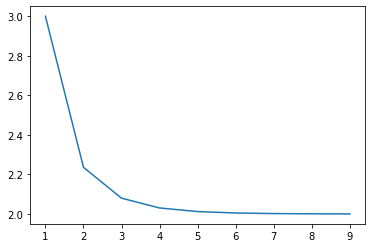

In [94]:
vec = [2, 1]
x = range(1,10)
y = [lp_norm(vec, i) for i in x]

plt.plot(x,y)

Your plot should look something like this:


![Lp norms](00-02-04-pic5.png)


For $p=1$ we get the sum of the all the component values. $3$ appears multiple times here. For $p=2$ we get the Euclidean length of the vector. This is always smaller or equal to the $p=1$ norm. This is a consequence of the triangle inequality. The case in two dimensions is an illustrative example. If we look at any vector with coordinates $[x,y]$, we can imagine it as the vector sum of the two vectors $[x,0]$ and $[0,y]$. The three vectors then form a right-angled triangle (see picture). 

![Lp norms 2](00-02-04-pic6.png)

The two short sides each have a length $|x|$ and $|y|$, whereas the hypotenuse has a length of $\sqrt{|x|^2+|y|^2}$. And it is $|x|+|y|\ge \sqrt{|x|^2+|y|^2}$, and $L^1([x,y])\ge L^2([x,y])$ accordingly. In fact, the $L^p$ norms for a fixed vector all decrease monotonously with increasing $p$, which we can see well in the graph above. We can also identify that the standards for an increasing $p$ approach the value $2$. This is no coincidence, because for $p=\infty$, the $L^p$ norm changes into the Chebyshev distance. This assigns the amount of the largest component in terms of amount to a vector.


In our example `vec=[2,1]` this is just $2$.


**Remember:**
* Calculate the distance between two vectors with the L2 norm with `norm(my_array_1 - my_array_2)`
* Metrics and norms are associated with distances
* These can be used as a measure for similarly
* Use *docstrings* and function tests for your own functions


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
The data was published here first: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 
***
